In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

from firesong.Firesong import firesong_simulation


## Firesong examples

This notebook walks through some examples of how you can use the function in `firesong/Firesong.py` to simulate neutrino source populations.

### Effect of density

Begin by simulating two different source populations that could explain the diffuse neutrino flux. The only difference will be the density of the populations. 

In [2]:
low_density_sim = firesong_simulation(
    None, filename=None, density=1e-10, Evolution="MD2014SFR", verbose=False
)

high_density_sim = firesong_simulation(
    None, filename=None, density=1e-6, Evolution="MD2014SFR", verbose=False
)


In [3]:
low_density_sim, len(low_density_sim["sources"]["dec"])

({'header': {'LF': 'SC',
   'Transient': False,
   'timescale': 1000.0,
   'fluxnorm': 1.44e-08,
   'delta_gamma': -0.2799999999999998,
   'luminosity': 7.900010843357433e+53},
  'total_flux': 1.184282062769721e-08,
  'sources': {'dec': array([ 34.32059133, -70.66684368,  42.6526456 , ..., -53.70457581,
          -20.30588365,  -8.37507448]),
   'ra': array([238.08314147, 176.50652828, 102.79032055, ...,   4.56349841,
          167.47583922,  83.85363222]),
   'flux': array([2.60528932e-11, 6.57342244e-12, 2.30072463e-12, ...,
          1.98106863e-10, 2.51119082e-11, 3.45856645e-11]),
   'z': array([2.83500913, 4.81923896, 7.25892627, ..., 1.30775929, 2.87524312,
          2.54377199])}},
 1329)

In [4]:
low_density_sim["sources"].keys()

dict_keys(['dec', 'ra', 'flux', 'z'])

In [5]:
high_density_sim, len(high_density_sim["sources"]["dec"])

({'header': {'LF': 'SC',
   'Transient': False,
   'timescale': 1000.0,
   'fluxnorm': 1.44e-08,
   'delta_gamma': -0.2799999999999998,
   'luminosity': 7.900010843357436e+49},
  'total_flux': 1.4336884783155642e-08,
  'sources': {'dec': array([-66.94724796,  58.0338807 , -40.41761002, ...,  57.69722803,
           72.68866456, -42.3024884 ]),
   'ra': array([312.67841826, 213.16366451, 240.21626446, ..., 228.22536449,
          242.74502502,   1.14268721]),
   'flux': array([2.65430917e-14, 2.27429996e-14, 4.99954492e-15, ...,
          2.84932302e-15, 8.55989314e-16, 3.64148571e-16]),
   'z': array([1.16962095, 1.24067179, 2.21004706, ..., 2.7394616 , 4.35065669,
          6.06465958])}},
 13295051)

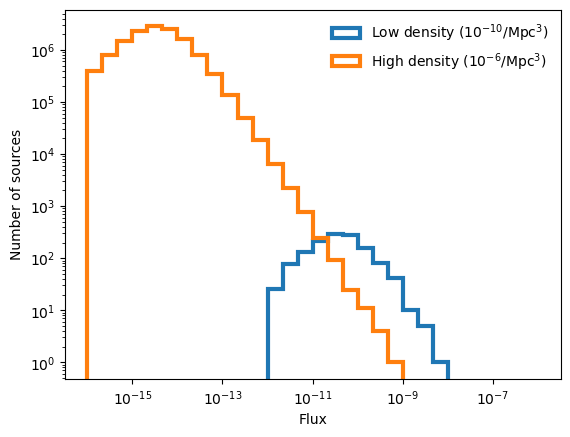

In [6]:
flux_bins = np.logspace(-16.0, -6.0, 31)
plt.hist(
    low_density_sim["sources"]["flux"],
    bins=flux_bins,
    histtype="step",
    lw=3.0,
    label=r"Low density $(10^{-10}/\rm Mpc^3)$",
)
plt.hist(
    high_density_sim["sources"]["flux"],
    bins=flux_bins,
    histtype="step",
    lw=3.0,
    label=r"High density $(10^{-6}/\rm Mpc^3)$",
)

plt.loglog()
plt.xlabel("Flux")
plt.ylabel("Number of sources")
plt.legend(frameon=False)

plt.show()


Which makes apparent two things about changing the density of neutrino sources:
* There are fewer sources when using a lower density, as expected
* Lower source densities have, on average, larger fluxes, in order to saturate the total flux

### Standard Candles vs. LogNormal luminosity functions

The user can also change the "luminosity function" of neutrino sources. This function describes the distribution of intrinsic luminosities of neutrino sources. For example, "Standard Candles" (`LF = 'SC'`) are sources which have the same luminosity, and the only thing that determines their flux on Earth is their distance. This is different from "LogNormal" (`LF = 'LG'`) where the distribution of luminosities is described by a LogNormal distribution, with width parameter `sigma`.

In [7]:
standard_candles = firesong_simulation(
    None, filename=None, density=1e-9, Evolution="MD2014SFR", LF="SC", verbose=False
)

lognormal_sources = firesong_simulation(
    None,
    filename=None,
    density=1e-9,
    Evolution="MD2014SFR",
    LF="LG",
    sigma=0.5,
    verbose=False,
)


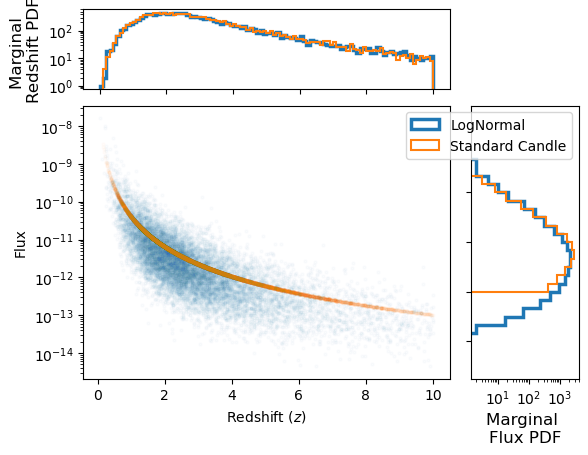

In [8]:
fig = plt.figure(dpi=100)
z_bins = np.linspace(0.0, 10.0, 101)

gs = GridSpec(4, 4)

ax_joint = fig.add_subplot(gs[1:4, 0:3])
ax_marg_x = fig.add_subplot(gs[0, 0:3])
ax_marg_y = fig.add_subplot(gs[1:4, 3])

ax_joint.plot(
    lognormal_sources["sources"]["z"],
    lognormal_sources["sources"]["flux"],
    linestyle="",
    marker="o",
    markersize=2,
    alpha=0.02,
    label="LogNormal sources",
)
ax_joint.plot(
    standard_candles["sources"]["z"],
    standard_candles["sources"]["flux"],
    linestyle="",
    marker="o",
    markersize=2,
    alpha=0.02,
    label="Standard Candles",
)
ax_joint.set_yscale("log")

ax_marg_x.hist(lognormal_sources["sources"]["z"], bins=z_bins, histtype="step", lw=2.5)
ax_marg_x.hist(standard_candles["sources"]["z"], bins=z_bins, histtype="step", lw=1.5)
ax_marg_x.set_yscale("log")

ax_marg_y.hist(
    lognormal_sources["sources"]["flux"],
    bins=flux_bins,
    orientation="horizontal",
    histtype="step",
    lw=2.5,
    label="LogNormal"
)
ax_marg_y.hist(
    standard_candles["sources"]["flux"],
    bins=flux_bins,
    orientation="horizontal",
    histtype="step",
    lw=1.5,
    label="Standard Candle"
)
ax_marg_y.set_yscale("log")
ax_marg_y.set_xscale("log")
ax_marg_y.legend()

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel(r"Redshift ($z$)")
ax_joint.set_ylabel("Flux")

# Set labels on marginals
ax_marg_y.set_xlabel("Marginal \nFlux PDF", fontsize=12)
ax_marg_x.set_ylabel("Marginal \nRedshift PDF", fontsize=12)

plt.show()


As is evident in the plot above, for Standard Candle sources, the flux is solely determined by the redshift.
For LogNormally distributed sources, there is spread around this value, with a width determined by `sigma`, while preserving the redshift distribution.

### Changing the Evolution

The other parameter that determines the specifics of the neutrino source population is the `Evolution`. This describes the number of sources that we expect per unit volume as a function of redshift. The number at a given redshift also takes into account cosmological factors.

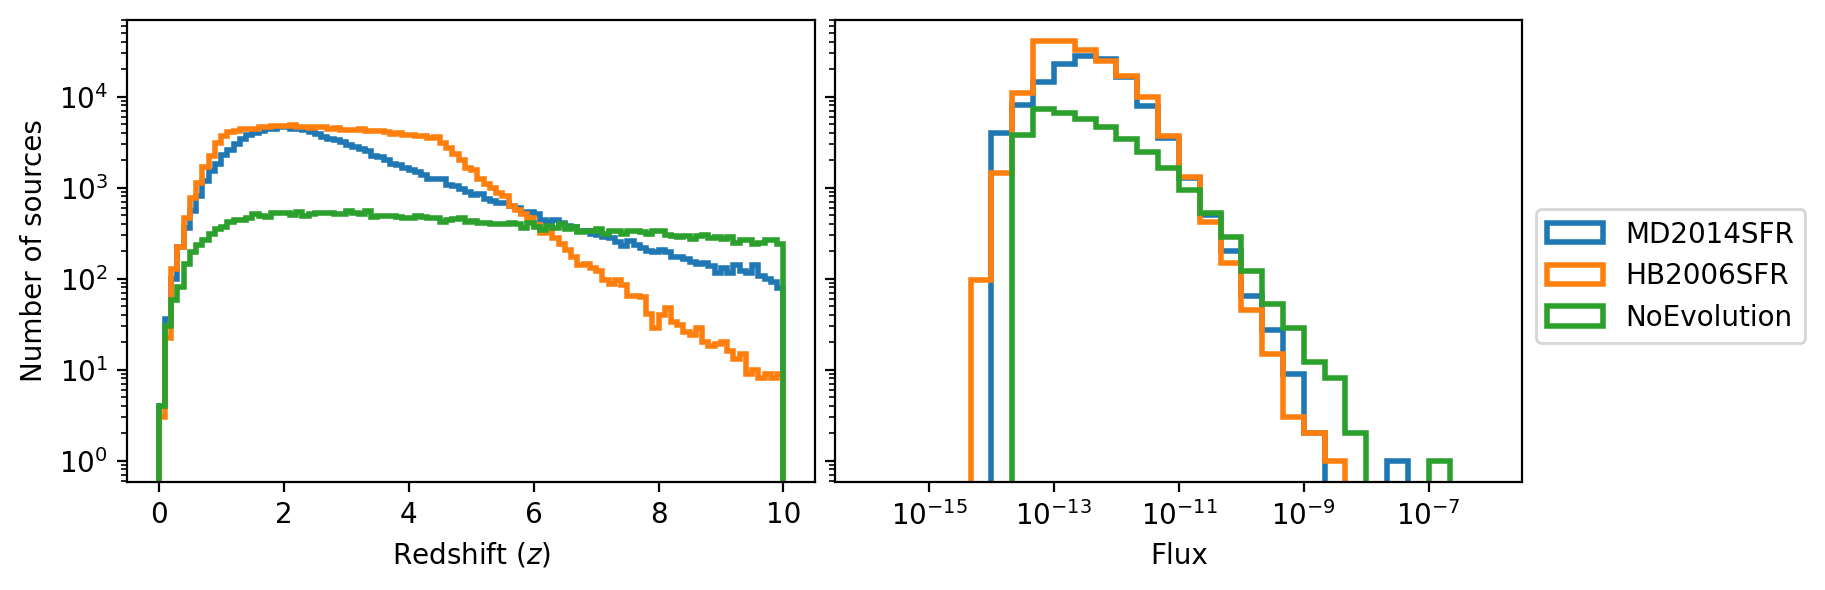

In [9]:
fig, aaxs = plt.subplots(
    nrows=1, ncols=2, sharey=True, figsize=(9, 3), dpi=200)
axs = np.ravel(aaxs)
axd = {"redshift": axs[0], "flux": axs[1]}
plt.subplots_adjust(wspace=0.03)

for evol in ["MD2014SFR", "HB2006SFR", "NoEvolution"]:
    sim = firesong_simulation(
        None, filename=None, density=1e-8, Evolution=evol, LF="SC", verbose=False
    )

    axd["redshift"].hist(
        sim["sources"]["z"], bins=z_bins, histtype="step", lw=2.0, label=evol
    )
    axd["flux"].hist(sim["sources"]["flux"], bins=flux_bins, histtype="step", lw=2.0)


axd["redshift"].legend(loc=(2.05, 0.3))
axd["redshift"].set_yscale("log")
axd["flux"].set_xscale("log")
axd["redshift"].set_xlabel(r"Redshift ($z$)")
axd["flux"].set_xlabel(r"Flux")
axd["redshift"].set_ylabel("Number of sources")

plt.show()


On the left is the number of sources as a function of redshift for a few different `Evolution` models. On the right is the number of sources as a function of the flux on Earth.

# sandbox

fluxnorm E^2 dPhi/dE = GeV s^-1 cm^-2 sr^-1 (default 1.44E-8)

total_flux: per steradian; flux per source: GeV s^-1 cm^-2

In [19]:
from astropy.cosmology import Planck18, z_at_value
import astropy.units as u
Planck18.luminosity_distance(0.3365) # TXS 0506+056

<Quantity 1830.08071709 Mpc>

In [22]:
z_at_value(Planck18.comoving_distance, 1830 * u.Mpc)

<Quantity 0.46570797 redshift>

In [ ]:
z_at_value(Planck18.luminosity_distance, 1830 * u.Mpc)

<Quantity 0.33648722 redshift>

In [ ]:
z_at_value(Planck18.luminosity_distance, 14.4 * u.Mpc)

<Quantity 0.0032524 redshift>

In [10]:
_lf = "LG"
sim1 = firesong_simulation(
    None,
    filename=None,
    density=1e-8,
    fluxnorm=1e-8,
    index=2,
    Evolution="NoEvolution",
    LF=_lf,
    verbose=False,
)

sim2 = firesong_simulation(
    None,
    filename=None,
    density=1e-7,
    fluxnorm=1e-8,
    index=2,
    Evolution="NoEvolution",
    LF=_lf,
    verbose=False,
)

sim3 = firesong_simulation(
    None,
    filename=None,
    density=1e-7,
    fluxnorm=0.5e-8,
    index=2,
    Evolution="NoEvolution",
    LF=_lf,
    verbose=False,
)

sim4 = firesong_simulation(
    None,
    filename=None,
    density=1e-8,
    fluxnorm=0.5e-8,
    index=2,
    Evolution="NoEvolution",
    LF=_lf,
    verbose=False,
)

In [11]:
sim1["total_flux"], sim2["total_flux"], sim3["total_flux"]

(7.155858587973778e-09, 8.655360747598553e-09, 4.606802307967908e-09)

In [12]:
np.sum(sim1["sources"]["flux"]), np.sum(sim2["sources"]["flux"]), np.sum(sim3["sources"]["flux"]), np.sum(sim2["sources"]["flux"]) / np.sum(sim3["sources"]["flux"])

(8.992317108042341e-08,
 1.087664709553003e-07,
 5.7890785149009936e-08,
 1.8788218310623561)

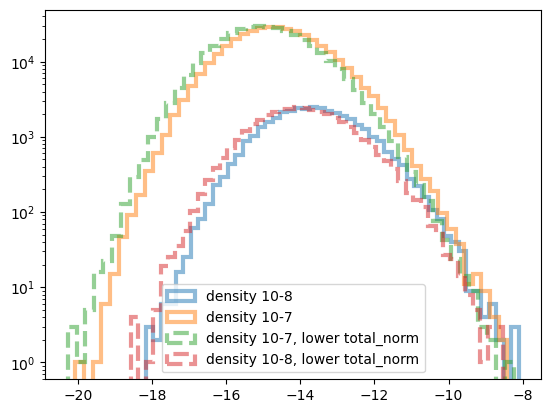

In [13]:
plt.hist(
    np.log10(sim1["sources"]["flux"]),
    bins=50,
    alpha=0.5,
    label="density 10-8",
    lw=3,
    histtype="step",
)
plt.hist(
    np.log10(sim2["sources"]["flux"]),
    bins=50,
    alpha=0.5,
    label="density 10-7",
    lw=3,
    histtype="step",
)
plt.hist(
    np.log10(sim3["sources"]["flux"]),
    bins=50,
    alpha=0.5,
    label="density 10-7, lower total_norm",
    lw=3,
    histtype="step",
    ls="--",
)
plt.hist(
    np.log10(sim4["sources"]["flux"]),
    bins=50,
    alpha=0.5,
    label="density 10-8, lower total_norm",
    lw=3,
    histtype="step",
    ls="--",
)
plt.yscale("log")
plt.legend()

In [14]:
import seaborn as sns

/home/hpc/capn/capn102h/miniconda3/envs/plenum/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hpc/capn/capn102h/miniconda3/envs/plenum/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/hpc/capn/capn102h/miniconda3/envs/plenum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hpc/capn/capn102h/miniconda3/envs/plenum/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

<Axes: >

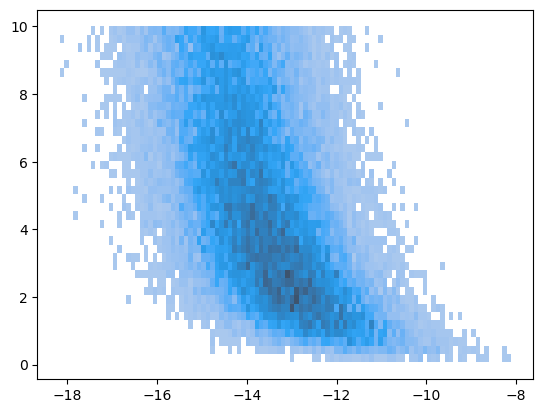

In [15]:
sns.histplot(
    x=np.log10(sim1["sources"]["flux"]),
    y=sim1["sources"]["z"],
)


/home/hpc/capn/capn102h/miniconda3/envs/plenum/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/hpc/capn/capn102h/miniconda3/envs/plenum/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


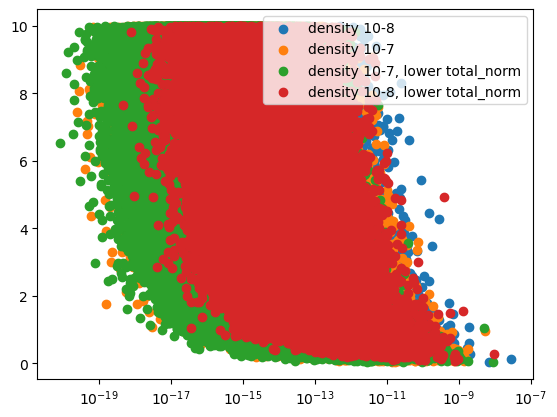

In [ ]:
plt.scatter(
    sim1["sources"]["flux"],
    sim1["sources"]["z"],
    label="density 10-8",
)
plt.scatter(
    sim2["sources"]["flux"],
    sim2["sources"]["z"],
    label="density 10-7",
)
plt.scatter(
    sim3["sources"]["flux"],
    sim3["sources"]["z"],
    label="density 10-7, lower total_norm",
)
plt.scatter(
    sim4["sources"]["flux"],
    sim4["sources"]["z"],
    label="density 10-8, lower total_norm",
)
plt.xscale("log")
plt.legend()

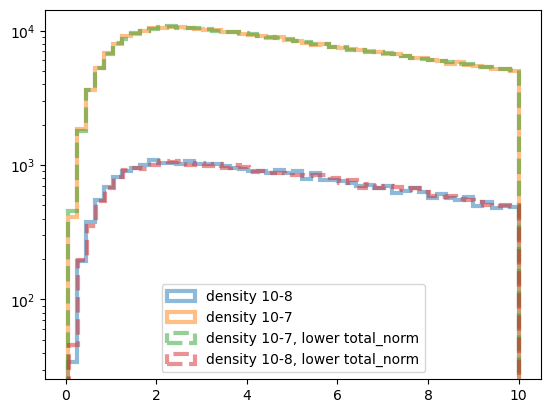

In [23]:
plt.hist(
    sim1["sources"]["z"],
    bins=50,
    alpha=0.5,
    label="density 10-8",
    lw=3,
    histtype="step",
)
plt.hist(
    sim2["sources"]["z"],
    bins=50,
    alpha=0.5,
    label="density 10-7",
    lw=3,
    histtype="step",
)
plt.hist(
    sim3["sources"]["z"],
    bins=50,
    alpha=0.5,
    label="density 10-7, lower total_norm",
    lw=3,
    histtype="step",
    ls="--",
)
plt.hist(
    sim4["sources"]["z"],
    bins=50,
    alpha=0.5,
    label="density 10-8, lower total_norm",
    lw=3,
    histtype="step",
    ls="--",
)
plt.yscale("log")
plt.legend()

In [16]:
import pandas as pd

In [17]:
sources_df = pd.DataFrame( sim["sources"])

In [18]:
sources_df

,dec,ra,flux,z
0,-83.474274,292.513120,5.029137e-14,8.326997
1,-38.620103,72.828324,1.138486e-13,6.043699
2,-43.910113,29.574670,2.279427e-13,4.613659
3,-5.549236,108.085391,2.016745e-12,1.998744
4,62.259297,332.385808,1.691042e-13,5.180450
...,...,...,...,...
37446,-33.283179,70.867790,5.119183e-14,8.268964
37447,-18.405862,166.284374,2.370470e-13,4.544192
37448,-36.677027,301.971917,5.292277e-14,8.161339
37449,52.712605,177.670587,4.275261e-13,3.618725


In [19]:
sources_df.iloc[np.argmax(sources_df["flux"])]

dec     2.584421e+01
ra      3.505852e+02
flux    1.567084e-08
z       4.636505e-02
Name: 4912, dtype: float64